# **News Summarization**

1. Introduction
2. Loading the data
3. Data Pre-Processing
    - Handling Null (or) NA values
    - Lowecase Transformation
    - Removing HTML tags (if any)
4. Exploratory Data Analysis(EDA)
    - Word Cloud
    - Vocabulary of the Corpus
    - Top 50 Frequent words
    - Top 50 Bigrams and Trigrams
5. Word Embedding
6. LSTM Model
    - Building the model
    - Hyperparameter Tuning
    - Evaluating the model

# ABOUT THE DATA

The main aim of the project is to generate short length descriptions of news articles and summarizing large amount of information which can be represented in compressed space. 

Dataset is from kaggle https://www.kaggle.com/code/rakshithanil/textsummarization-simple-heapq-transformers/data 


# LOADING DATA

In [ ]:
# importing required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.draw.dispersion import dispersion_plot
import re
from nltk.collocations import *
import numpy as np

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
nltk_stops = nltk.corpus.stopwords.words('english')


In [ ]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have"}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv(r'/content/drive/Othercomputers/My Laptop/News-Summarization/cnn_dailymail/train.zip')
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in data set-1')

There are 287113 rows and 3 columns in data set-1


In [ ]:
news_summary_df = df.sample(frac=0.005, random_state=1337) # down sampling the data

news_summary_df.shape

(1436, 3)

In [ ]:
news_summary_df.head()

,id,article,highlights
214243,a1723368fdbd9967eadb574ca9ea0e43e4daee00,This is the dramatic moment a brave jeweller c...,Two armed men broke into the shop in Giardini ...
36488,676dfe98eff68a75fc0e1e073adc7258eaf11e28,(CNN) -- Former Dodgers manager Tommy Lasorda ...,"Tommy Lasorda, 84, is in stable condition in N..."
130973,355b3861837b5c112de5e75f8efc29fb8ffdacdf,By . Jessica Jerreat and Helen Pow . PUBLISHED...,Valerie Rae Bradshaw was found just after 7 p....
284063,fc075b08f5fc2974725e1beb9a2ad1fddb2c81fb,A bigamist was caught by his wife after she sa...,Nicolette Smith disappointed Stephen Smith not...
49483,8bda1f10cb2b0d8a1de8a900d79ea4eed4f85a57,They may resemble magical-looking toadstools o...,Pictures show water droplets splashing into a ...


In [ ]:
news_summary_df.iloc[0,1] # news article

"This is the dramatic moment a brave jeweller confronted armed bandits and booted them out of his shop - giving one a kick in the bottom for good measure. The amazing scenes were caught on a security camera during a hold up in the shop close to Messina in Sicily, the Mafia's island stronghold. Police are using the footage in an attempt to trace the two armed men who burst into the shop. SCROLL DOWN FOR VIDEO . Unsuspecting: The seller opens a cloth bag of jewels for a customer as one of the attackers stands outside the door . Break in: The pair make their way in as the shop keeper continues dealing with the customer while on the phone . In the shots, the unidentified owner . of the store is seen unrolling a cloth bag, containing jewels, with a . customer standing the other side of the counter. As they discuss the items a man is buzzed in and his accomplice quickly slips inside. Within seconds, the first man has pulled a gun out and pointed it at the jeweller. His partner, who is wearin

Articles column contains the articles whereas the highlights column shown below contains the summary



In [ ]:
news_summary_df.iloc[0,2] #summary

"Two armed men broke into the shop in Giardini Naxos, Messina, Sicily .\nThey grabbed a bag of jewels the shop keeper was showing to a customer .\nThe shop keeper pulled out his own gun and chased the pair out .\nHe kicked one out the door .\nThe town is a Mafia stronghold but police have ruled the gang's involvement ."

In [ ]:
news_df = news_summary_df.drop('id', axis=1) # dropped id column since it is irrelevant

In [ ]:
news_df

,article,highlights
214243,This is the dramatic moment a brave jeweller c...,Two armed men broke into the shop in Giardini ...
36488,(CNN) -- Former Dodgers manager Tommy Lasorda ...,"Tommy Lasorda, 84, is in stable condition in N..."
130973,By . Jessica Jerreat and Helen Pow . PUBLISHED...,Valerie Rae Bradshaw was found just after 7 p....
284063,A bigamist was caught by his wife after she sa...,Nicolette Smith disappointed Stephen Smith not...
49483,They may resemble magical-looking toadstools o...,Pictures show water droplets splashing into a ...
...,...,...
5062,By . Alex Greig . A 17-year-old girl is lucky ...,"Charlotte Boyse, 17, was on her way to prom in..."
571,By . Lizzie Edmonds . Eastern Europeans will h...,Ania Lewandowska said Poles will vote 'Yes' in...
22426,"Almost 100,000 people have signed an online pe...",Julien Blanc is a self-styled 'pick-up artist'...
7175,Liverpool boss Brendan Rodgers felt his side h...,Liverpool advance to last 16 of Capital One Cu...


# DATA PRE-PROCESSING

#### Handling `null/na` values

In [ ]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 214243 to 172918
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   article     1436 non-null   object
 1   highlights  1436 non-null   object
dtypes: object(2)
memory usage: 33.7+ KB


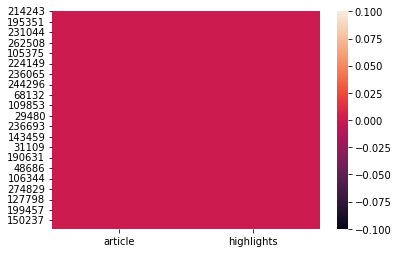

In [ ]:
sns.heatmap(news_df.isna()) # few NA values are present in full text column

In [ ]:
news_df[news_df['article'].isna()]

,article,highlights


No null or na values in the data

#### Lowercase Transformation

In [ ]:
news_df['article'] = news_df['article'].apply(str.lower)
news_df['highlights'] = news_df['highlights'].apply(str.lower)

#### Remove HTML tags (if any)

In [ ]:
from bs4 import BeautifulSoup
def remove_tags(raw_text:str):
  return BeautifulSoup(raw_text, "lxml").text

In [ ]:
news_df['article']=news_df['article'].apply(lambda text : remove_tags(text))

#### Not Removing Stop Words,and No Lemmetaization/Stemming - we do not want to loose the sentence structure since we have to predict grammatical correct sentences

In [ ]:
# data after pre processing
news_df.head()

,article,highlights
214243,this is the dramatic moment a brave jeweller c...,two armed men broke into the shop in giardini ...
36488,(cnn) -- former dodgers manager tommy lasorda ...,"tommy lasorda, 84, is in stable condition in n..."
130973,by . jessica jerreat and helen pow . published...,valerie rae bradshaw was found just after 7 p....
284063,a bigamist was caught by his wife after she sa...,nicolette smith disappointed stephen smith not...
49483,they may resemble magical-looking toadstools o...,pictures show water droplets splashing into a ...


In [ ]:
stop_words = set(stopwords.words('english')) 
def text_cleaner(text):
  newString = text.lower()
  newString = BeautifulSoup(newString, "lxml").text
  newString = re.sub(r'\([^)]*\)', '', newString)
  newString = re.sub('"','', newString)
  newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
  newString = re.sub(r"'s\b","",newString)
  newString = re.sub("[^a-zA-Z]", " ", newString) 
  tokens = [w for w in newString.split() if not w in stop_words]
  long_words=[]
  for i in tokens:
      if len(i)>1:                  #removing short word
          long_words.append(i)   
  return (" ".join(long_words)).strip()

cleaned_text = []
for t in news_df['article']:
    cleaned_text.append(text_cleaner(t))
#print('done')

def summary_cleaner(text):
  newString = re.sub('"','', text)
  newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
  newString = re.sub(r"'s\b","",newString)
  newString = re.sub("[^a-zA-Z]", " ", newString)
  newString = newString.lower()
  tokens=newString.split()
  newString=''
  for i in tokens:
      if len(i)>=3:                                 
          newString=newString+i+' '  
  return newString

#Call the above function
cleaned_summary = []
for t in news_df['highlights']:
    cleaned_summary.append(summary_cleaner(t))


news_df['cleaned_text']=cleaned_text
news_df['cleaned_summary']=cleaned_summary
news_df.replace('', np.nan, inplace=True)
news_df.dropna(axis=0,inplace=True)
print("done")

done


In [ ]:
cleaned_text =np.array(news_df['cleaned_text'])
cleaned_summary=np.array(news_df['cleaned_summary'])

short_text=[]
short_summary=[]

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split())<=63 and len(cleaned_text[i].split())<=600):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])



In [ ]:
news_df=pd.DataFrame({'article':short_text,'highlights':short_summary})


In [ ]:
news_df.head()

,article,highlights
0,dramatic moment brave jeweller confronted arme...,two armed men broke into the shop giardini nax...
1,former dodgers manager tommy lasorda suffered ...,tommy lasorda stable condition new york the ha...
2,jessica jerreat helen pow published est june u...,valerie rae bradshaw was found just after sund...
3,bigamist caught wife saw photograph wedding te...,nicolette smith disappointed stephen smith not...
4,may resemble magical looking toadstools alien ...,pictures show water droplets splashing into tr...


In [ ]:
news_df.iloc[0,1]

'two armed men broke into the shop giardini naxos messina sicily they grabbed bag jewels the shop keeper was showing customer the shop keeper pulled out his own gun and chased the pair out kicked one out the door the town mafia stronghold but police have ruled the gang involvement '

# 3. DATA EXPLORATION (or) CORPUS STATISTICS



In [ ]:
text = ' '.join(news_df['article'])

#### TYPE TOKEN RATIO (TTR) - LEXICAL RICHNESS OF THE CORPUS

A type-token ratio (TTR) is the total number of UNIQUE words (types) divided by the total number of words (tokens) in a given segment of language.

The closer the TTR ratio is to 1, the greater the lexical richness of the segment.

In [ ]:
tokens = nltk.word_tokenize(text)

In [ ]:
total_tokens  = len(tokens) 
unique_tokens = len(set(tokens))

In [ ]:
total_tokens

380413

In [ ]:
unique_tokens

31332

In [ ]:
unique_tokens/total_tokens # ttr ratio

0.08236311587669191

In [ ]:
# removing stop words
tokens = [token for token in tokens if token not in nltk_stops]

In [ ]:
# removing punctuation
tokens = [token for token in tokens if token.isalpha()]

#### Top 20 Frequent words

In [ ]:
fdist = nltk.FreqDist(tokens)
top_tokens = fdist.most_common(20)
top_tokens

[('said', 4636),
 ('one', 1730),
 ('year', 1671),
 ('would', 1380),
 ('people', 1320),
 ('new', 1274),
 ('two', 1269),
 ('time', 1218),
 ('also', 1202),
 ('last', 1059),
 ('police', 989),
 ('could', 986),
 ('first', 971),
 ('years', 939),
 ('told', 911),
 ('mr', 853),
 ('old', 828),
 ('like', 786),
 ('world', 778),
 ('back', 719)]

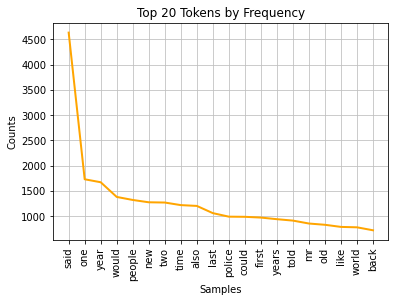

In [ ]:
# frequency plot:
fdist.plot(20, title="Top 20 Tokens by Frequency", color='orange')

#### Word Cloud

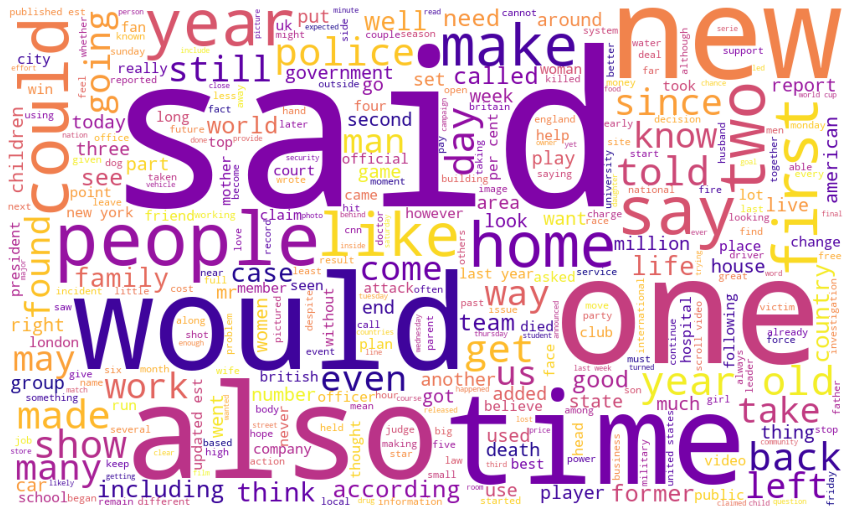

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

wordcloud = WordCloud(stopwords = nltk_stops,
                background_color="white", 
                max_words=350, 
                width=1000, 
                height=600, 
                max_font_size=256,
                random_state=1, colormap='plasma').generate(text)

# plot the wordcloud object
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
# visualizing hapaxes
fdist.hapaxes()[:20]

['messina',
 'unrolling',
 'gingerly',
 'umberto',
 'backside',
 'artery',
 'bleed',
 'dodger',
 'mets',
 'donates',
 'bordered',
 'parkway',
 'vacationed',
 'aloyse',
 'auri',
 'boating',
 'pickering',
 'repayments',
 'banjul',
 'dupe']

#### Top 20 Bigrams and Trigrams

In [ ]:
def alpha_filter(w):
  # pattern to match word of non-alphabetical characters
  pattern = re.compile('^[^a-z]+$')
  if (pattern.match(w)):
    return True
  else:
    return False

In [ ]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(tokens)

# removing punctuation, non -aplhabetical tokens
finder.apply_word_filter(alpha_filter)

# removing stop words
finder.apply_word_filter(lambda w: w in nltk_stops)

bigram_scored = finder.score_ngrams(bigram_measures.raw_freq)
bigram_scored[:20]

[(('year', 'old'), 0.0015764277988172845),
 (('last', 'year'), 0.0007500532932603105),
 (('new', 'york'), 0.0007237356338476681),
 (('per', 'cent'), 0.0006974179744350256),
 (('updated', 'est'), 0.0006289920599621552),
 (('published', 'est'), 0.0006132014643145697),
 (('united', 'states'), 0.0004631908056625076),
 (('scroll', 'video'), 0.00043687314624986514),
 (('last', 'week'), 0.00041055548683722266),
 (('world', 'cup'), 0.00038686959336584444),
 (('years', 'ago'), 0.00036844723177699467),
 (('premier', 'league'), 0.00033160250859929523),
 (('told', 'cnn'), 0.0003237072107755025),
 (('prime', 'minister'), 0.0003105483810691812),
 (('first', 'time'), 0.00029475778542159575),
 (('two', 'years'), 0.00026844012600895327),
 (('last', 'month'), 0.0002368589347137823),
 (('daily', 'mail'), 0.00023422716877251803),
 (('police', 'said'), 0.00021317304124240406),
 (('los', 'angeles'), 0.00020001421153608283)]

In [ ]:
# visualizing ngrams
def visualize_ngrams_topn(scores:list,n:int):
    x_val = []
    y_val = []
    for ngram in scores[n::-1]:
        x_val.append(' '.join(ngram[0]))
        y_val.append(ngram[1])
    plt.figure(figsize=(10,10))
    plt.barh(x_val,y_val,color='orange')

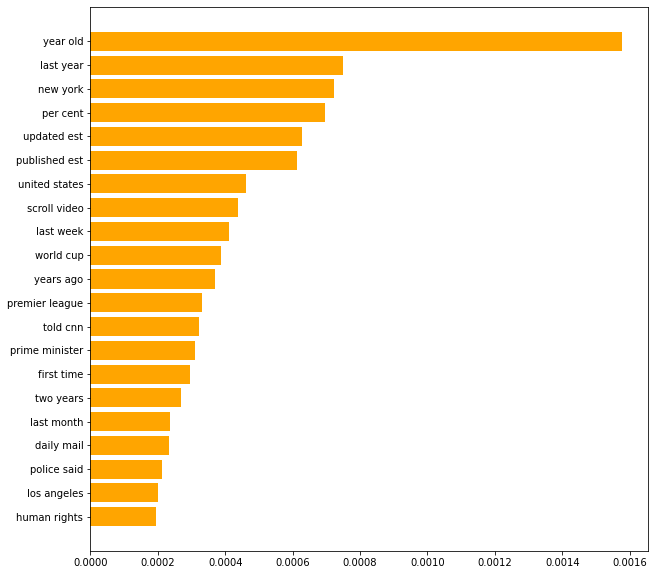

In [ ]:
visualize_ngrams_topn(bigram_scored,20)

In [ ]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder = TrigramCollocationFinder.from_words(tokens)

# removing punctuation, non - aplhabetical tokens
finder.apply_word_filter(alpha_filter)

# removing stop words
finder.apply_word_filter(lambda w: w in nltk_stops)

trigram_scored = finder.score_ngrams(trigram_measures.raw_freq)
trigram_scored[:20]

[(('daily', 'mail', 'reporter'), 0.00014474712676953362),
 (('president', 'barack', 'obama'), 0.00011842946735689114),
 (('reporter', 'published', 'est'), 0.00011316593547436265),
 (('new', 'york', 'city'), 0.00010790240359183416),
 (('mail', 'reporter', 'published'), 0.0001052706376505699),
 (('expressed', 'commentary', 'solely'), 8.948004200298443e-05),
 (('opinions', 'expressed', 'commentary'), 8.948004200298443e-05),
 (('august', 'updated', 'est'), 7.368944635539894e-05),
 (('est', 'august', 'updated'), 7.368944635539894e-05),
 (('est', 'january', 'updated'), 7.368944635539894e-05),
 (('january', 'updated', 'est'), 7.368944635539894e-05),
 (('published', 'est', 'august'), 7.368944635539894e-05),
 (('published', 'est', 'january'), 7.368944635539894e-05),
 (('updated', 'est', 'august'), 7.368944635539894e-05),
 (('updated', 'est', 'january'), 7.368944635539894e-05),
 (('two', 'years', 'ago'), 7.105768041413468e-05),
 (('year', 'old', 'girl'), 6.842591447287044e-05),
 (('cnn', 'studen

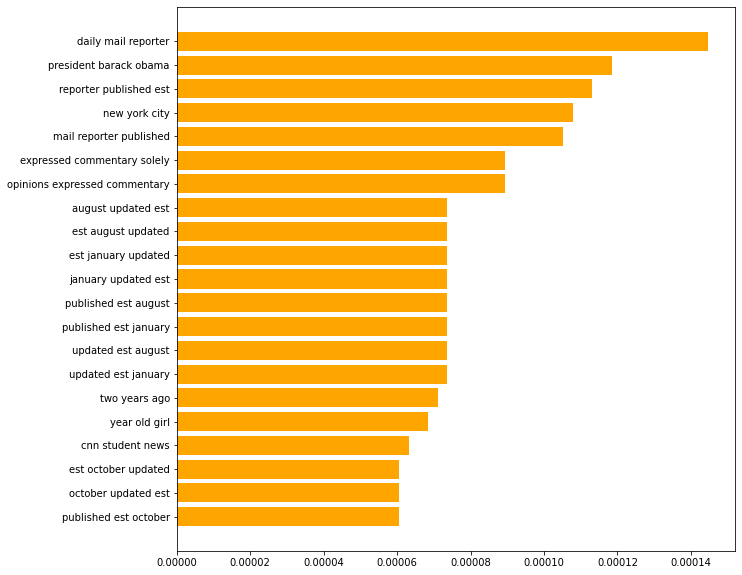

In [ ]:
visualize_ngrams_topn(trigram_scored,20)

In [ ]:
news_df['highlights']=news_df['highlights'].apply(lambda x:'sostok '+x+' eostok')
news_df.head()

,article,highlights
0,dramatic moment brave jeweller confronted arme...,sostok two armed men broke into the shop giard...
1,former dodgers manager tommy lasorda suffered ...,sostok tommy lasorda stable condition new york...
2,jessica jerreat helen pow published est june u...,sostok valerie rae bradshaw was found just aft...
3,bigamist caught wife saw photograph wedding te...,sostok nicolette smith disappointed stephen sm...
4,may resemble magical looking toadstools alien ...,sostok pictures show water droplets splashing ...


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(np.array(news_df['article']),np.array(news_df['highlights']),
                                               test_size=0.1,random_state=0,shuffle=True)


In [ ]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((1063,), (119,), (1063,), (119,))

In [ ]:
X_train[2]

'claire bates archaeologists discovered remains roman theatre dating back years dr paul wilkinson founder kent archaeological field school believes first kind found britain theatre nearly circular cockpit style orchestra would seated people found faversham kent behind dr wilkinson back garden field school based roman remains excavations site archaeologists discovered remains bronze age cockpit theatre theatres unheard britain arrival romans illustration depicts theatre near st albans would used around time faversham cockpit theatre site shows activity dating back bronze age roman theatre would used religious occasions really excited history buffs dr wilkinson fighting preserve unique find future generations applied become ancient monument site said really amazing find first one britain beyond garden unique wonderful discovery faversham britain theatre could held people going request become ancient monument site important preserve future generations would religious sanctuary romans woul

In [ ]:
Y_train[2]

'sostok roman remains reveal first british example ancient cockpit style theatre had large nearly circular orchestra pit with narrow stage set much further back than traditional theatres found site where kent archaeological field school based archaeologist paul wilkinson said really amazing find the first one britain and just beyond garden  eostok'

# 4. Word Embedding

In [ ]:
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences


In [ ]:
voc_size = unique_tokens
embedding_width = 300
max_sum_len=63
max_text_len=600


In [ ]:
X_tokenizer = Tokenizer()
X_tokenizer.fit_on_texts(list(X_train))

thresh=4
cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in X_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
X_tokenizer=Tokenizer(num_words=tot_cnt)
X_tokenizer.fit_on_texts(list(X_train))
X_train_seq = X_tokenizer.texts_to_sequences(X_train)
X_test_seq=X_tokenizer.texts_to_sequences(X_test)
X_train=pad_sequences(X_train_seq,maxlen=max_text_len,padding='post')
X_test= pad_sequences(X_test_seq,maxlen=max_text_len,padding='post')   
X_voc=X_tokenizer.num_words +1
    
Y_tokenizer = Tokenizer()
Y_tokenizer.fit_on_texts(list(Y_train))
thresh=6
cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in Y_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
Y_tokenizer=Tokenizer(num_words=(tot_cnt))
Y_tokenizer.fit_on_texts(list(Y_train))
Y_train_seq = Y_tokenizer.texts_to_sequences(Y_train)
Y_test_seq=Y_tokenizer.texts_to_sequences(Y_test)
Y_train=pad_sequences(Y_train_seq,maxlen=max_sum_len,padding='post')
Y_test= pad_sequences(Y_test_seq,maxlen=max_sum_len,padding='post')  
Y_voc=Y_tokenizer.num_words +1
    
#print(Y_tokenizer.word_counts['sostok'],len(Y_train))
    


In [ ]:
ind=[]
for i in range(len(Y_train)):
    cnt=0
    for j in Y_train[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

Y_train=np.delete(Y_train,ind, axis=0)
X_train=np.delete(X_train,ind, axis=0)
    
ind=[]
for i in range(len(Y_test)):
    cnt=0
    for j in Y_test[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

Y_test=np.delete(Y_test,ind, axis=0)
X_test=np.delete(X_test,ind, axis=0)

In [ ]:
# Now grab the GloVe embeddings we will need: Takes about a minute to download.
# Then it take about another minute to fill the data structure.
# Note that the zip file with the embeddings is hosted in Dropbox. If this does
# not work, it could be downloaded from the GloVe website and uploaded to the
# file store for the VM running this notebook.

!wget https://www.dropbox.com/s/ewfdwppopt3pild/glove.twitter.27B.100d.txt.zip?dl=1
!unzip glove.twitter.27B.100d.txt.zip?dl=1

print("Loading word embeddings...")
embeddings_index = dict() # Initialize an empty dictionary
embedding_dir = 'glove.twitter.27B.100d.txt'

f = open(embedding_dir,encoding="utf8")
for line in f:
    values = line.split() # Split the line on white space
    word = values[0] # This is the word, so use it as the key
    coefs = np.asarray(values[1:], dtype='float32') # Here are the values for each dimension of the vector for this word
    embeddings_index[word] = coefs # Add to the dictionary
f.close()

print('Loaded %s word vectors.' % len(embeddings_index))

--2022-04-12 02:33:30--  https://www.dropbox.com/s/ewfdwppopt3pild/glove.twitter.27B.100d.txt.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/ewfdwppopt3pild/glove.twitter.27B.100d.txt.zip [following]
--2022-04-12 02:33:31--  https://www.dropbox.com/s/dl/ewfdwppopt3pild/glove.twitter.27B.100d.txt.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc8700f8658a4dd4e5aef01cf95.dl.dropboxusercontent.com/cd/0/get/BjPt6sEaeOg914b3vYpuQs1RxbWmbuLlOgDj6bRfzKkHiCCKHn9n8QHqzE8liXWSkmkX9kdb42hkT80u1HIo8GoZZYfy3gIto6JQTEmI34Ra5smqR7avwIoRp2Os66DIDbFF3HcMzgTblyobtJTAONwo781xi37Zer2SA3a9pUN0zg/file?dl=1# [following]
--2022-04-12 02:33:32--  https://ucc8700f8658a4dd4e5aef01cf95.dl.dropboxusercontent.com/cd/0/get/BjPt6sEaeOg9

In [ ]:
# Fill our matrix value with zeroes. A vector of zeroes will be the default
# if we don't match a token with the gloVe vocabulary.
embeddings_index = {}

word_index = X_tokenizer.word_index
embedding_matrix = np.zeros((len(word_index) + 1, 300))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
    # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
print("done")

done


In [ ]:
X_voc,embedding_matrix.shape

(29769, (29769, 300))

# 5. LSTM Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Input,Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.layers import TimeDistributed


In [ ]:
from keras import backend as k

k.clear_session()

latent_dim = 300
embedding_dim=300

# Encoder
encoder_inputs = Input(shape=(max_text_len,))

#embedding layer
enc_emb =  Embedding(X_voc, embedding_dim,weights=[embedding_matrix],trainable=True)(encoder_inputs)

#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#encoder lstm 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#encoder lstm 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(Y_voc, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

#dense layer
decoder_dense =  TimeDistributed(Dense(Y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model 
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 600)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 600, 300)     8930700     ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 600, 300),   721200      ['embedding[0][0]']              
                                 (None, 300),                                                     
                                 (None, 300)]                                                     
                                                                                              

In [ ]:
def model_test(embedding_matrix):
    from keras import backend as k
    k.clear_session()
    
    encoder_inputs=Input(shape=(max_text_len,))
    encoder_emb=Embedding(X_voc,embedding_width,weights=[embedding_matrix],trainable=True)(encoder_inputs)
    encoder_lstm1 = LSTM(300,return_sequences=True,return_state=True)
    encoder_output1, state_h1, state_c1 = encoder_lstm1(encoder_emb)
    encoder_lstm2 = LSTM(300,return_sequences=True,return_state=True)
    encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)
    encoder_lstm3=LSTM(300, return_state=True, return_sequences=True)
    encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)


    decoder_inputs = Input(shape=(None,))
    dec_emb_layer = Embedding(Y_voc, embedding_width,trainable=True)
    dec_emb = dec_emb_layer(decoder_inputs)
    decoder_lstm = LSTM(300, return_sequences=True, return_state=True)
    decoder_outputs,decoder_fwd_state, decoder_back_state =decoder_lstm(dec_emb,initial_state=[state_h, state_c])
    decoder_dense =TimeDistributed(Dense(Y_voc, activation='softmax'))
    decoder_outputs =decoder_dense(decoder_outputs)

# Define the model 
    model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

    model.summary()
    return model,encoder_inputs,encoder_outputs,state_h,state_c,decoder_inputs,dec_emb_layer,decoder_lstm,decoder_dense

In [ ]:
m,encoder_inputs,encoder_outputs,state_h,state_c,decoder_inputs,dec_emb_layer,decoder_lstm,decoder_dense=model_test(embedding_matrix)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 600)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 600, 300)     8930700     ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 600, 300),   721200      ['embedding[0][0]']              
                                 (None, 300),                                                     
                                 (None, 300)]                                                     
                                                                                              

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)

#history=model.fit([X_train,Y_train[:,:-1]],Y_train.reshape(Y_train.shape[0],Y_train.shape[1], 1)[:,1:] ,epochs=50,callbacks=[es],batch_size=128, validation_data=([X_test,Y_test[:,:-1]],Y_test.reshape(Y_test.shape[0],Y_test.shape[1], 1)[:,1:]))
history=model.fit([X_train,Y_train[:,:-1]], 
                      Y_train.reshape(Y_train.shape[0],Y_train.shape[1], 1)
                      [:,1:] ,epochs=10,callbacks=[es],
                      batch_size=128, validation_data=([X_test,Y_test[:,:-1]],
                                                       Y_test.reshape(Y_test.shape[0],Y_test.shape[1], 1)[:,1:]))

Epoch 1/10
9/9 [==============================] - 62s 6s/step - loss: 7.0716 - val_loss: 4.2601
Epoch 2/10
9/9 [==============================] - 52s 6s/step - loss: 5.1677 - val_loss: 4.0607
Epoch 3/10
9/9 [==============================] - 52s 6s/step - loss: 5.0684 - val_loss: 3.9622
Epoch 4/10
9/9 [==============================] - 52s 6s/step - loss: 4.9561 - val_loss: 4.0149
Epoch 5/10
9/9 [==============================] - 51s 6s/step - loss: 4.7799 - val_loss: 3.7168
Epoch 6/10
9/9 [==============================] - 52s 6s/step - loss: 4.6653 - val_loss: 3.7446
Epoch 7/10
9/9 [==============================] - 52s 6s/step - loss: 4.6019 - val_loss: 3.6561
Epoch 8/10
9/9 [==============================] - 52s 6s/step - loss: 4.5640 - val_loss: 3.6224
Epoch 9/10
9/9 [==============================] - 52s 6s/step - loss: 4.5185 - val_loss: 3.6371
Epoch 10/10
9/9 [==============================] - 51s 6s/step - loss: 4.4932 - val_loss: 3.6434
Epoch 10: early stopping


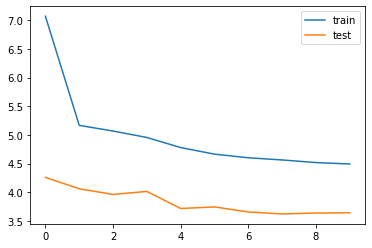

In [ ]:
# Visualize the model learning
from matplotlib import pyplot

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
reverse_target_word_index=Y_tokenizer.index_word
reverse_source_word_index=X_tokenizer.index_word
target_word_index=Y_tokenizer.word_index

In [ ]:
latent_dim=300
# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_text_len,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs) 
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2) 

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [ ]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
      
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_sum_len-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [ ]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString


In [ ]:
for i in range(0,100):
    print("Review:",seq2text(X_train[i]))
    print("Original summary:",seq2summary(Y_train[i]))
    print("Predicted summary:",decode_sequence(X_train[i].reshape(1,max_text_len)))
    print("\n")

Predicted summary:  cowboys surveyor upset upset stockpiled reference breath stakes seasons machines valentino complications hate clinging flight canadian admitted style style disorderly robot refuse primarily taking defenders promising confused burkina unit over over eye darlaston email racially racially gerlach responsible kidscape space seed related vacancy syrian syrian scallops vacancy drowned fake droplets carney carney shiite skull fighting workouts collected subsidy start start peninsula injury


Review: snejana farberov published est february updated est february young jennifer mcpartland found dead creek hours veered texas country road frantic search missing mother two texas ended wednesday afternoon discovery body creek leaving devastated husband sobbing knees middle country road heartrending scene played around pm yesterday cory mcpartland got news dive team located body wife jennifer nearby oyster creek far waterlogged car upon hearing wife mother two children dead mr mcpa

KeyboardInterrupt: ignored

In [ ]:
def predict():
    reverse_target_word_index=Y_tokenizer.index_word
    reverse_source_word_index=X_tokenizer.index_word
    target_word_index=Y_tokenizer.word_index

    latent_dim=300
    # Encode the input sequence to get the feature vector
    encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# Decoder setup
# Below tensors will hold the states of the previous time step
    decoder_state_input_h = Input(shape=(latent_dim,))
    decoder_state_input_c = Input(shape=(latent_dim,))
    decoder_hidden_state_input = Input(shape=(max_text_len,latent_dim))

# Get the embeddings of the decoder sequence
    dec_emb2= dec_emb_layer(decoder_inputs) 
# To predict the next word in the sequence, set the initial states to the states from the previous time step
    decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

# A dense softmax layer to generate prob dist. over the target vocabulary
    decoder_outputs2 = decoder_dense(decoder_outputs2) 

# Final decoder model
    decoder_model = Model([decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, 
                                              decoder_state_input_c],[decoder_outputs2] + [state_h2, state_c2])
    
    def decode_sequence(input_seq):
    # Encode the input as state vectors.
        e_out, e_h, e_c = encoder_model.predict(input_seq)
    
    # Generate empty target sequence of length 1.
        target_seq = np.zeros((1,1))
    
    # Populate the first word of target sequence with the start word.
        target_seq[0, 0] = target_word_index['sostok']

        stop_condition = False
        decoded_sentence = ''
        while not stop_condition:
      
            output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
            sampled_token_index = np.argmax(output_tokens[0, -1, :])
            sampled_token = reverse_target_word_index[sampled_token_index]
        
            if(sampled_token!='eostok'):
                decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
            if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_sum_len-1)):
                stop_condition = True

        # Update the target sequence (of length 1).
            target_seq = np.zeros((1,1))
            target_seq[0, 0] = sampled_token_index

        # Update internal states
            e_h, e_c = h, c

        return decoded_sentence
    
    def seq2summary(input_seq):
        newString=''
        for i in input_seq:
            if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
                newString=newString+reverse_target_word_index[i]+' '
        return newString

    def seq2text(input_seq):
        newString=''
        for i in input_seq:
            if(i!=0):
                newString=newString+reverse_source_word_index[i]+' '
        return newString
    
    for i in range(0,100):
        print("Review:",seq2text(X_train[i]))
        print("Original summary:",seq2summary(Y_train[i]))
        print("Predicted summary:",decode_sequence(X_train[i].reshape(1,max_text_len)))
        print("\n")

In [ ]:
predict()